# Function Plotting (Interactive)

This is an interactive tutorial. You can click the rocket -> binder link at the top of this page to interact with the code and outputs below.

## Normal (Gaussian) distribution

The Gaussian / Normal Distribution function can be written in terms of its mean ($\mu$), and standard deviation ($\sigma$) in the following function:

$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{ -\frac{1}{2} (\frac{x-\mu}{\sigma})^2 }$

Let's try to plot it out with $\mu = 50$, and $\sigma = 15$.

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)

## Define the function

First we define the Gaussian distribution function using `def`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Gaussian(x, mu, sigma):
    term1 = 1 / (sigma * np.sqrt(2 * np.pi))
    term2 = np.exp(-0.5*((x - mu)/sigma)**2)
    
    return term1 * term2

## Make the curve

We input $\mu = 50$, $\sigma = 15$ and an array of x values from $\mu -5 \sigma$ to $\mu + 5 \sigma$.

In [2]:
# Compute the Gaussian 
mean = 50
stdev = 15
x = np.linspace(mean - 5*stdev, mean + 5*stdev, 1000)
y = Gaussian(x, mean, stdev)

## Plot the function

Below we plot the curve we made.

Text(0, 0.5, &#39;$\\frac{1}{\\sigma \\sqrt{2 \\pi}} e^{-\\frac{1}{2}(\\frac{x-\\mu}{\\sigma})^2 }$&#39;)

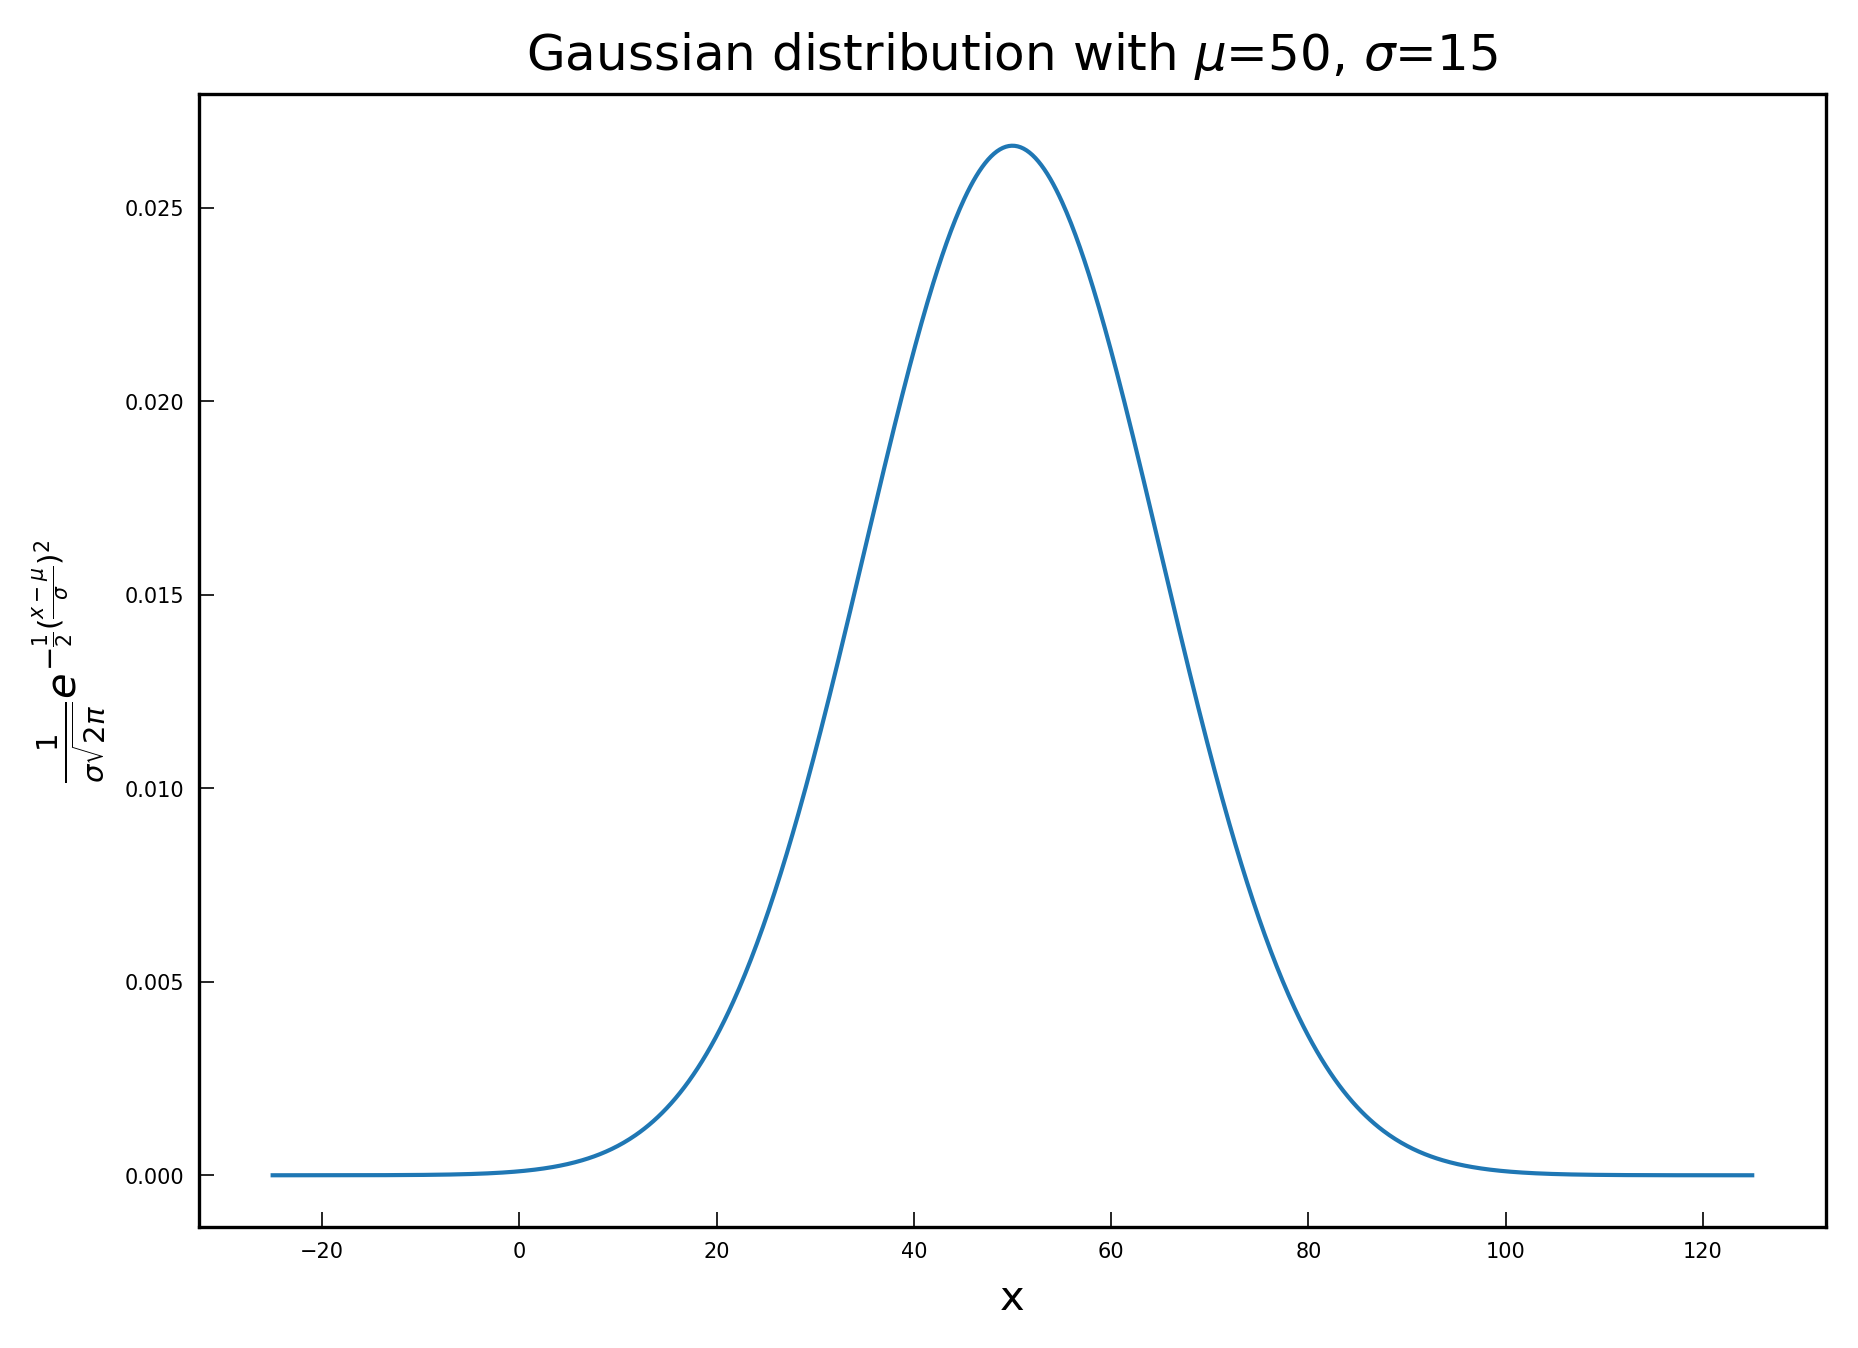

In [3]:
# Set up plot
f, ax = plt.subplots(figsize=(7, 5), dpi=300)

ax.plot(x, y, '-', lw=1, c='tab:blue')

#---------------
ax.tick_params(axis='both', direction='in')
ax.set_title(f'Gaussian distribution with $\mu$={mean}, $\sigma$={stdev}')
ax.set_xlabel('x') 
ax.set_ylabel(r'$\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2 }$') 

## Integrate the curve

The normal distrabution is a Probability Density Function (PDF), meaning the area under the curve represents the probability of an observation falling in that range. The total area under the curve should sum to 1 (indicating 100% probability). 

The Cumulative Distribution Function (CDF) is the area under a PDF and we can compute it by taking the integral using `numpy.trapz` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html)).


In [4]:
pdf = Gaussian(x, mean, stdev)
cdf = np.array([np.trapz(pdf[:i], x=x[:i]) for i in range(len(x))])

## Plot the CDF

Below we plot the Gaussian (PDF) and integral (CDF) over each other using `plt.subplots`.

Text(0.5, 0, &#39;x&#39;)

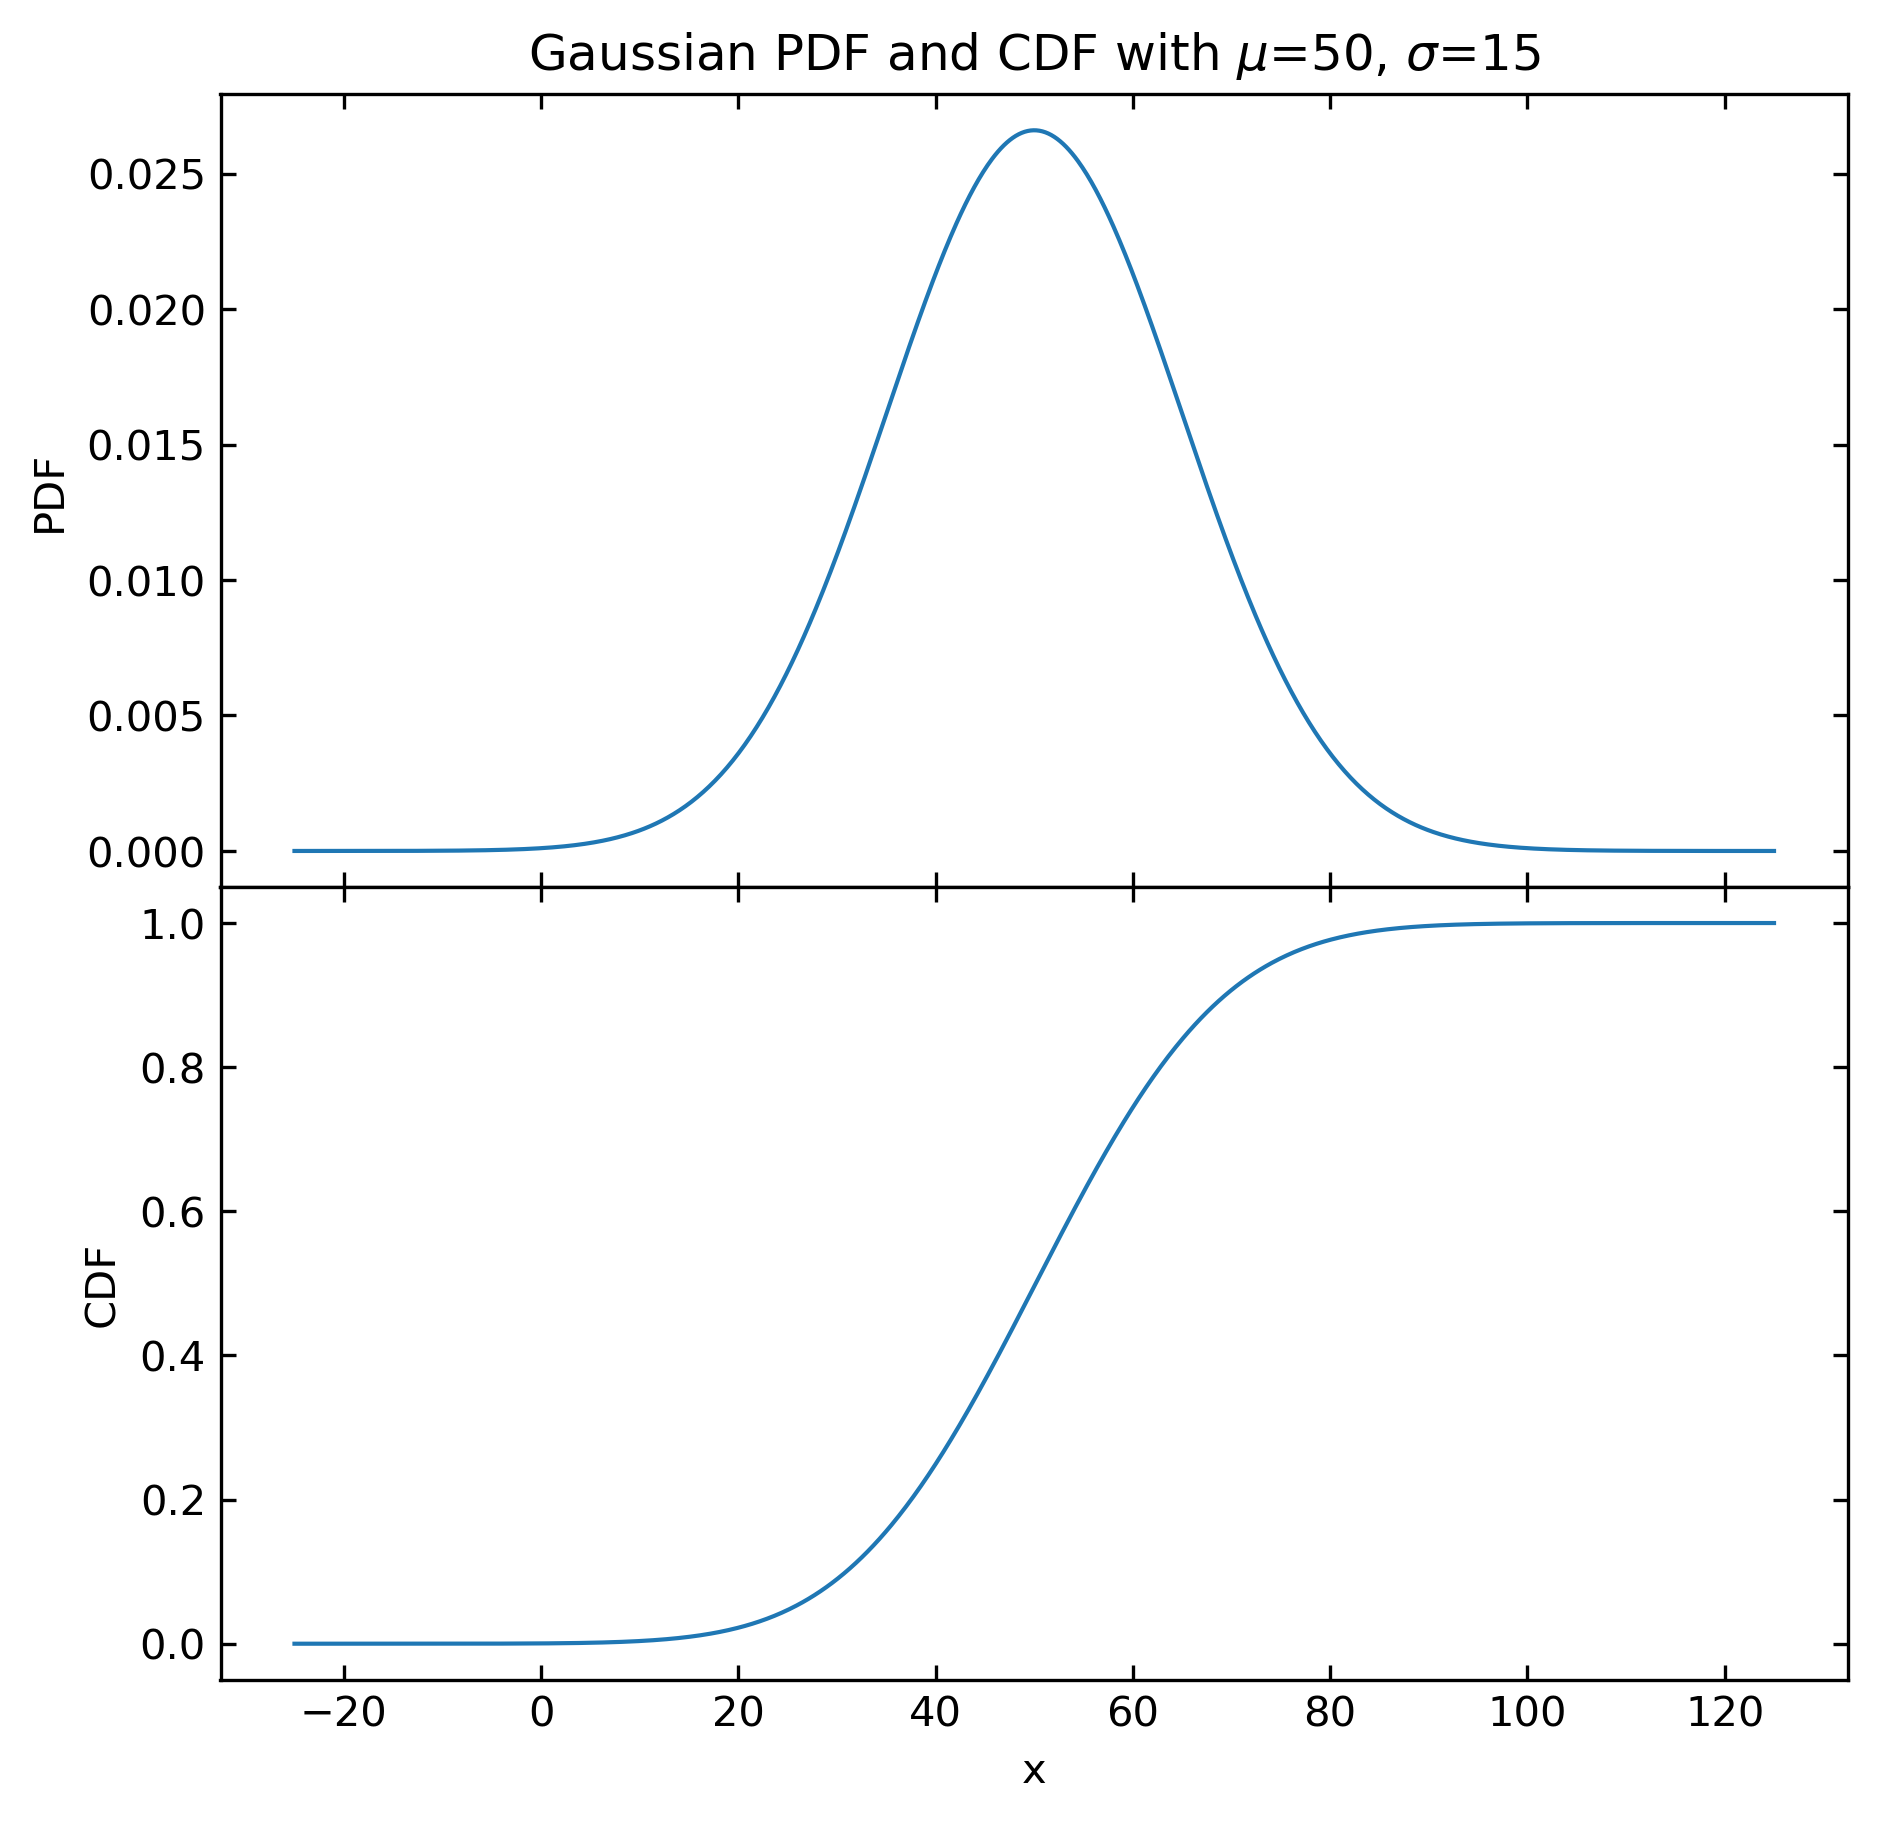

In [12]:
# Plot the pdf and cdf on 2 subplots
f, ax = plt.subplots(2, 1, figsize=(7, 7), dpi=300, gridspec_kw={'hspace':0})
ax[0].plot(x, pdf, '-', c='tab:blue')
ax[1].plot(x, cdf, '-', c='tab:blue')

# Set up plot parameters
for i in range(2):
    ax[i].tick_params(axis='both', right=True, top=True, direction='in')
ax[0].set_title(f'Gaussian PDF and CDF with $\mu$={mean}, $\sigma$={stdev}')
ax[0].set_ylabel('PDF') 
ax[1].set_ylabel('CDF') 
ax[1].set_xlabel('x') 

## The 68–95–99.7 rule

A $\pm 1\sigma$ interval around the mean ($\mu$) captures about 68% of the probability in a Gaussian function. If we know the CDF, we can take this interval around the mean and use it to compute the standard deviation of the original Gaussian.

To find the 68% probability interval centered on the mean, we want:

$P(0.68) = \mu \pm \frac{0.68}{2} = \mu \pm 0.34$

Then the upper and lower bounds in our case are:

$P_{upper} = 0.5 + 0.34 = 0.84$

$P_{lower} = 0.5 - 0.34 = 0.16$

So the interval capturing one standard deviation is:

$P(0.16, 0.84)$

Lets plot these two probabilities as straight lines on the CDF.

Text(-24, 0.55, &#39;68%&#39;)

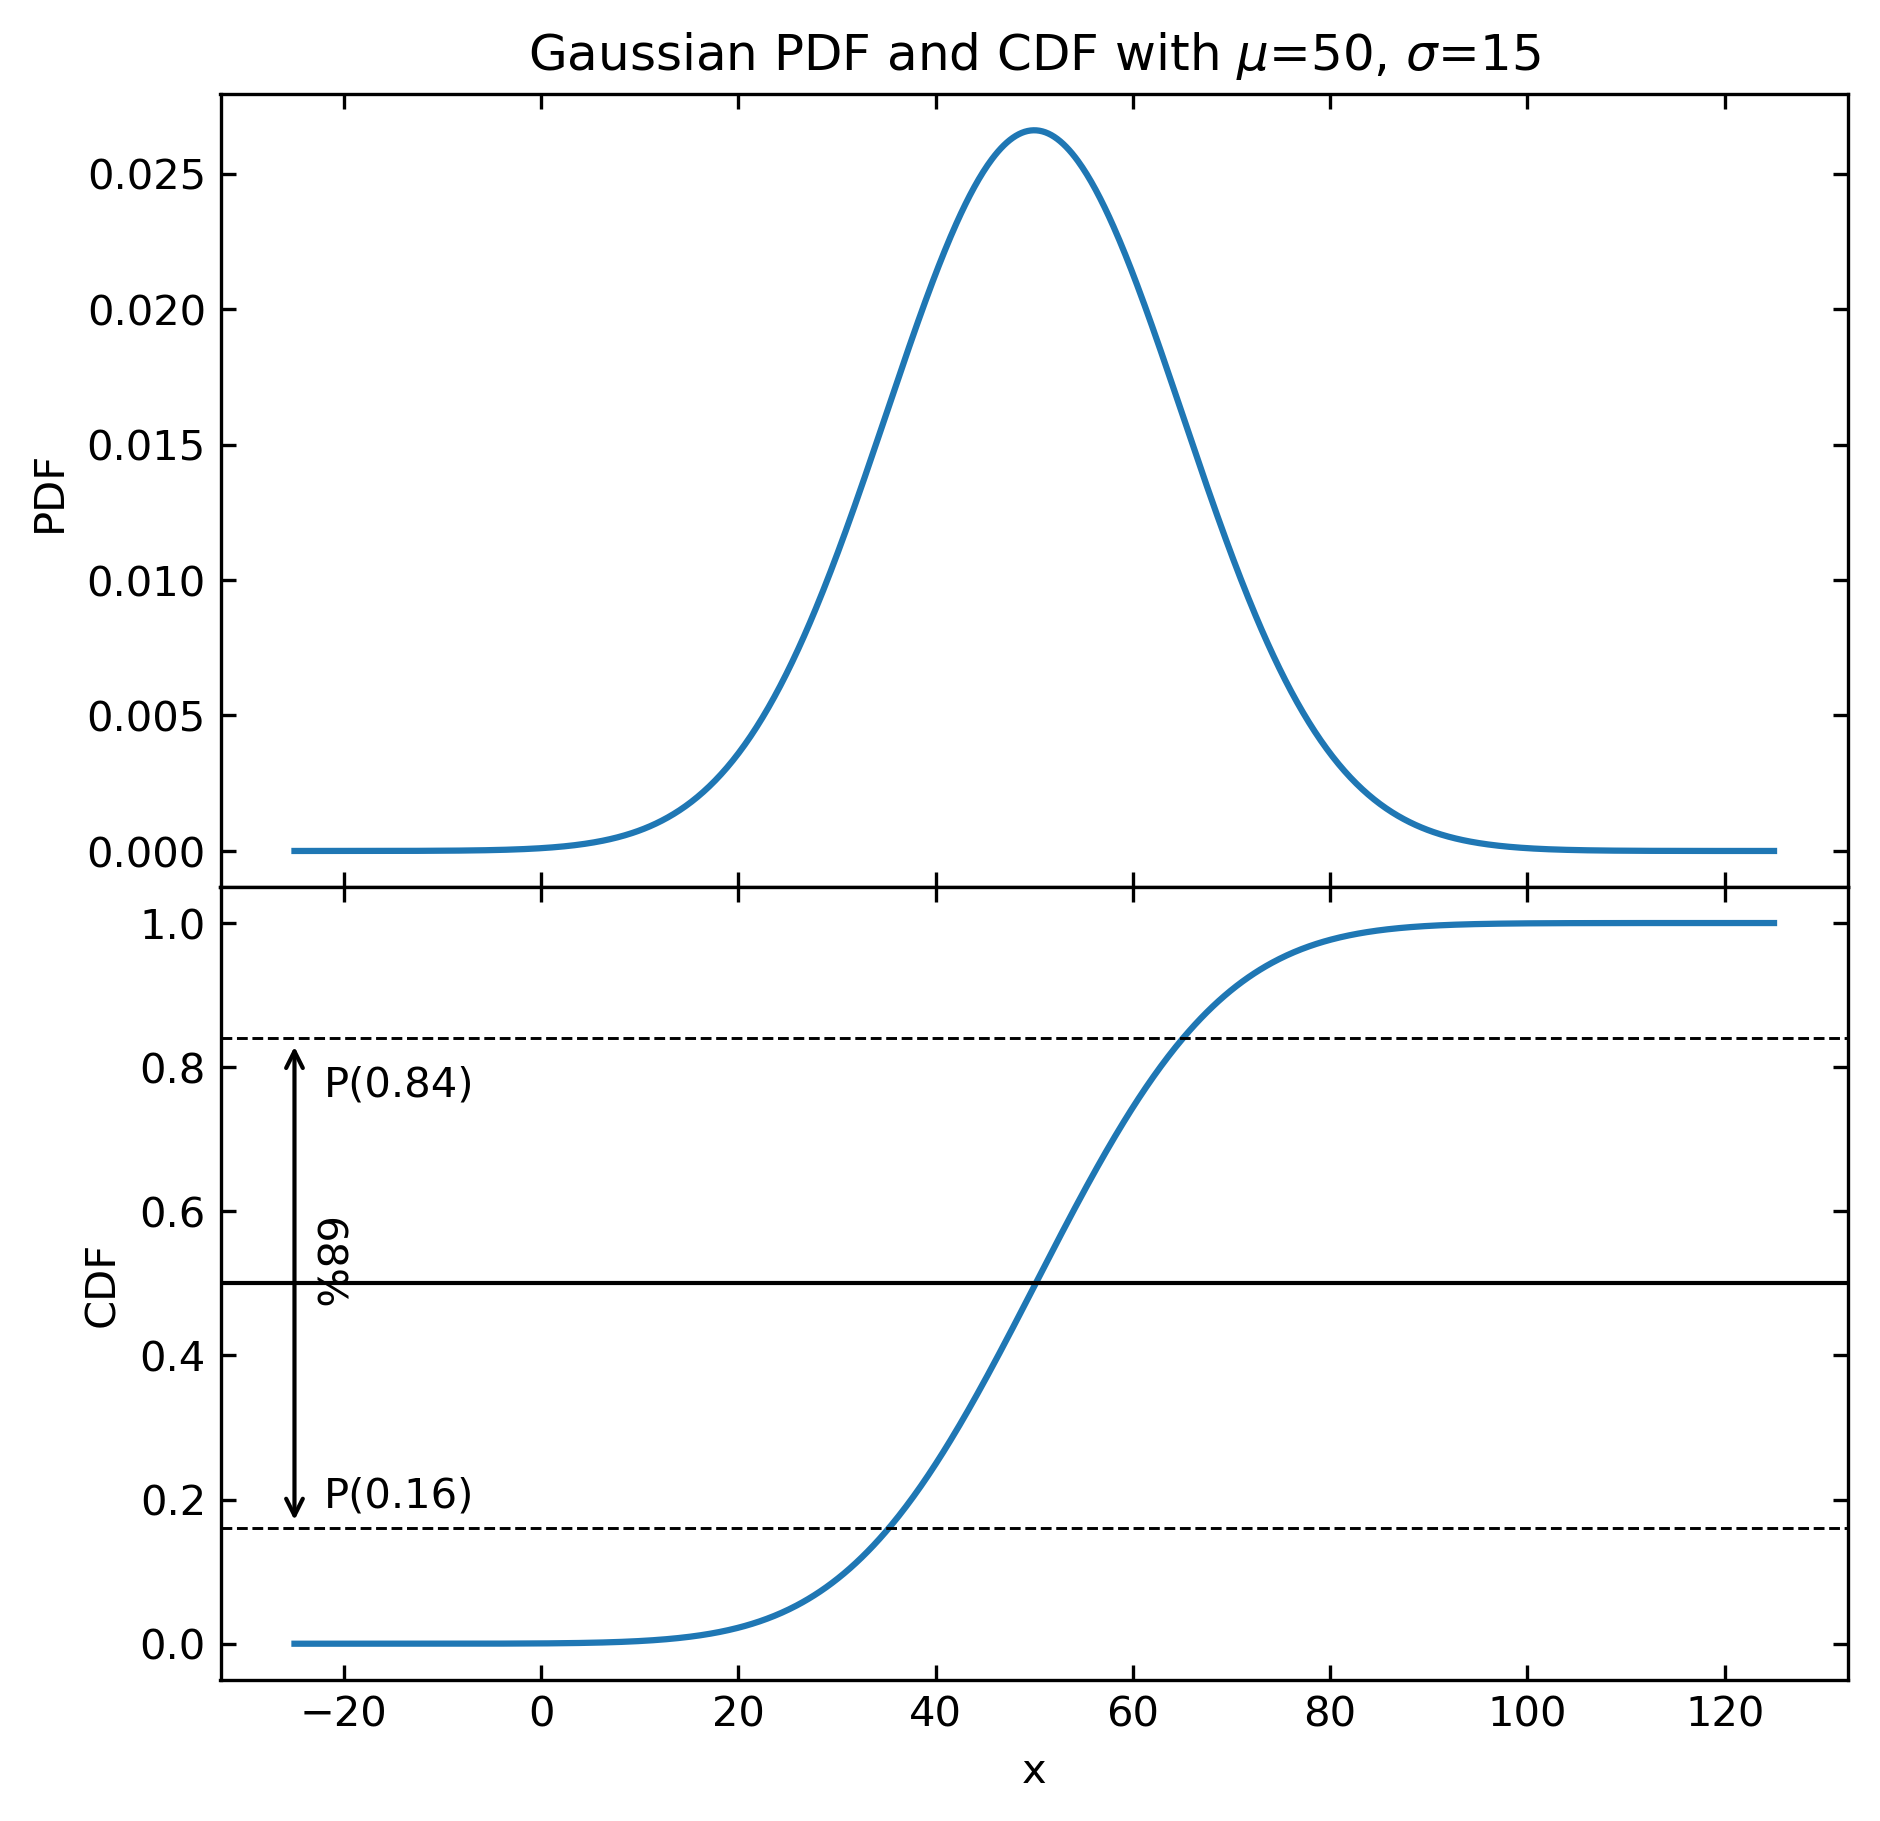

In [13]:
# Define variables representing the 68% interval we calculated above
p_lower = 0.16
p_upper = 0.84
p_label = '68%'

# ====== Create same plot as above =======
f, ax = plt.subplots(2, 1, figsize=(7, 7), dpi=300, gridspec_kw={'hspace':0})
ax[0].plot(x, pdf, '-', c='tab:blue')
ax[1].plot(x, cdf, '-', c='tab:blue')

for i in range(2):
    ax[i].tick_params(axis='both', right=True, top=True, direction='in')
ax[0].set_title(f'Gaussian PDF and CDF with $\mu$={mean}, $\sigma$={stdev}')
ax[0].set_ylabel('PDF') 
ax[1].set_ylabel('CDF') 
ax[1].set_xlabel('x') 
# =========================================
# Plot horizontal lines on the CDF corresponding to the 68% interval
ax[1].axhline(p_lower, c='k', lw=.7, ls='--' )
ax[1].axhline(0.50, c='k', lw=1, ls='-' )
ax[1].axhline(p_upper, c='k', lw=.7, ls='--' )

# Label the lines
ax[1].text(-22, p_upper-0.08, f'P({p_upper})') 
ax[1].text(-22, p_lower+0.03, f'P({p_lower})') 

ax[1].annotate(s='', xy=(-25, p_lower), xytext=(-25, p_upper), arrowprops=dict(arrowstyle='<->'))
ax[1].text(-24, 0.55, p_label, style='normal', rotation=270) 

Now if we trace where the 68% probability interval meets the CDF curve back up to the Gaussian PDF, we can see that about 2/3rds of the distribution is within this interval, and we find the standard deviation, $\sigma \approx 15$ as we expected.

Text(54, 0.016, &#39;$\\sigma \\sim 14.8$&#39;)

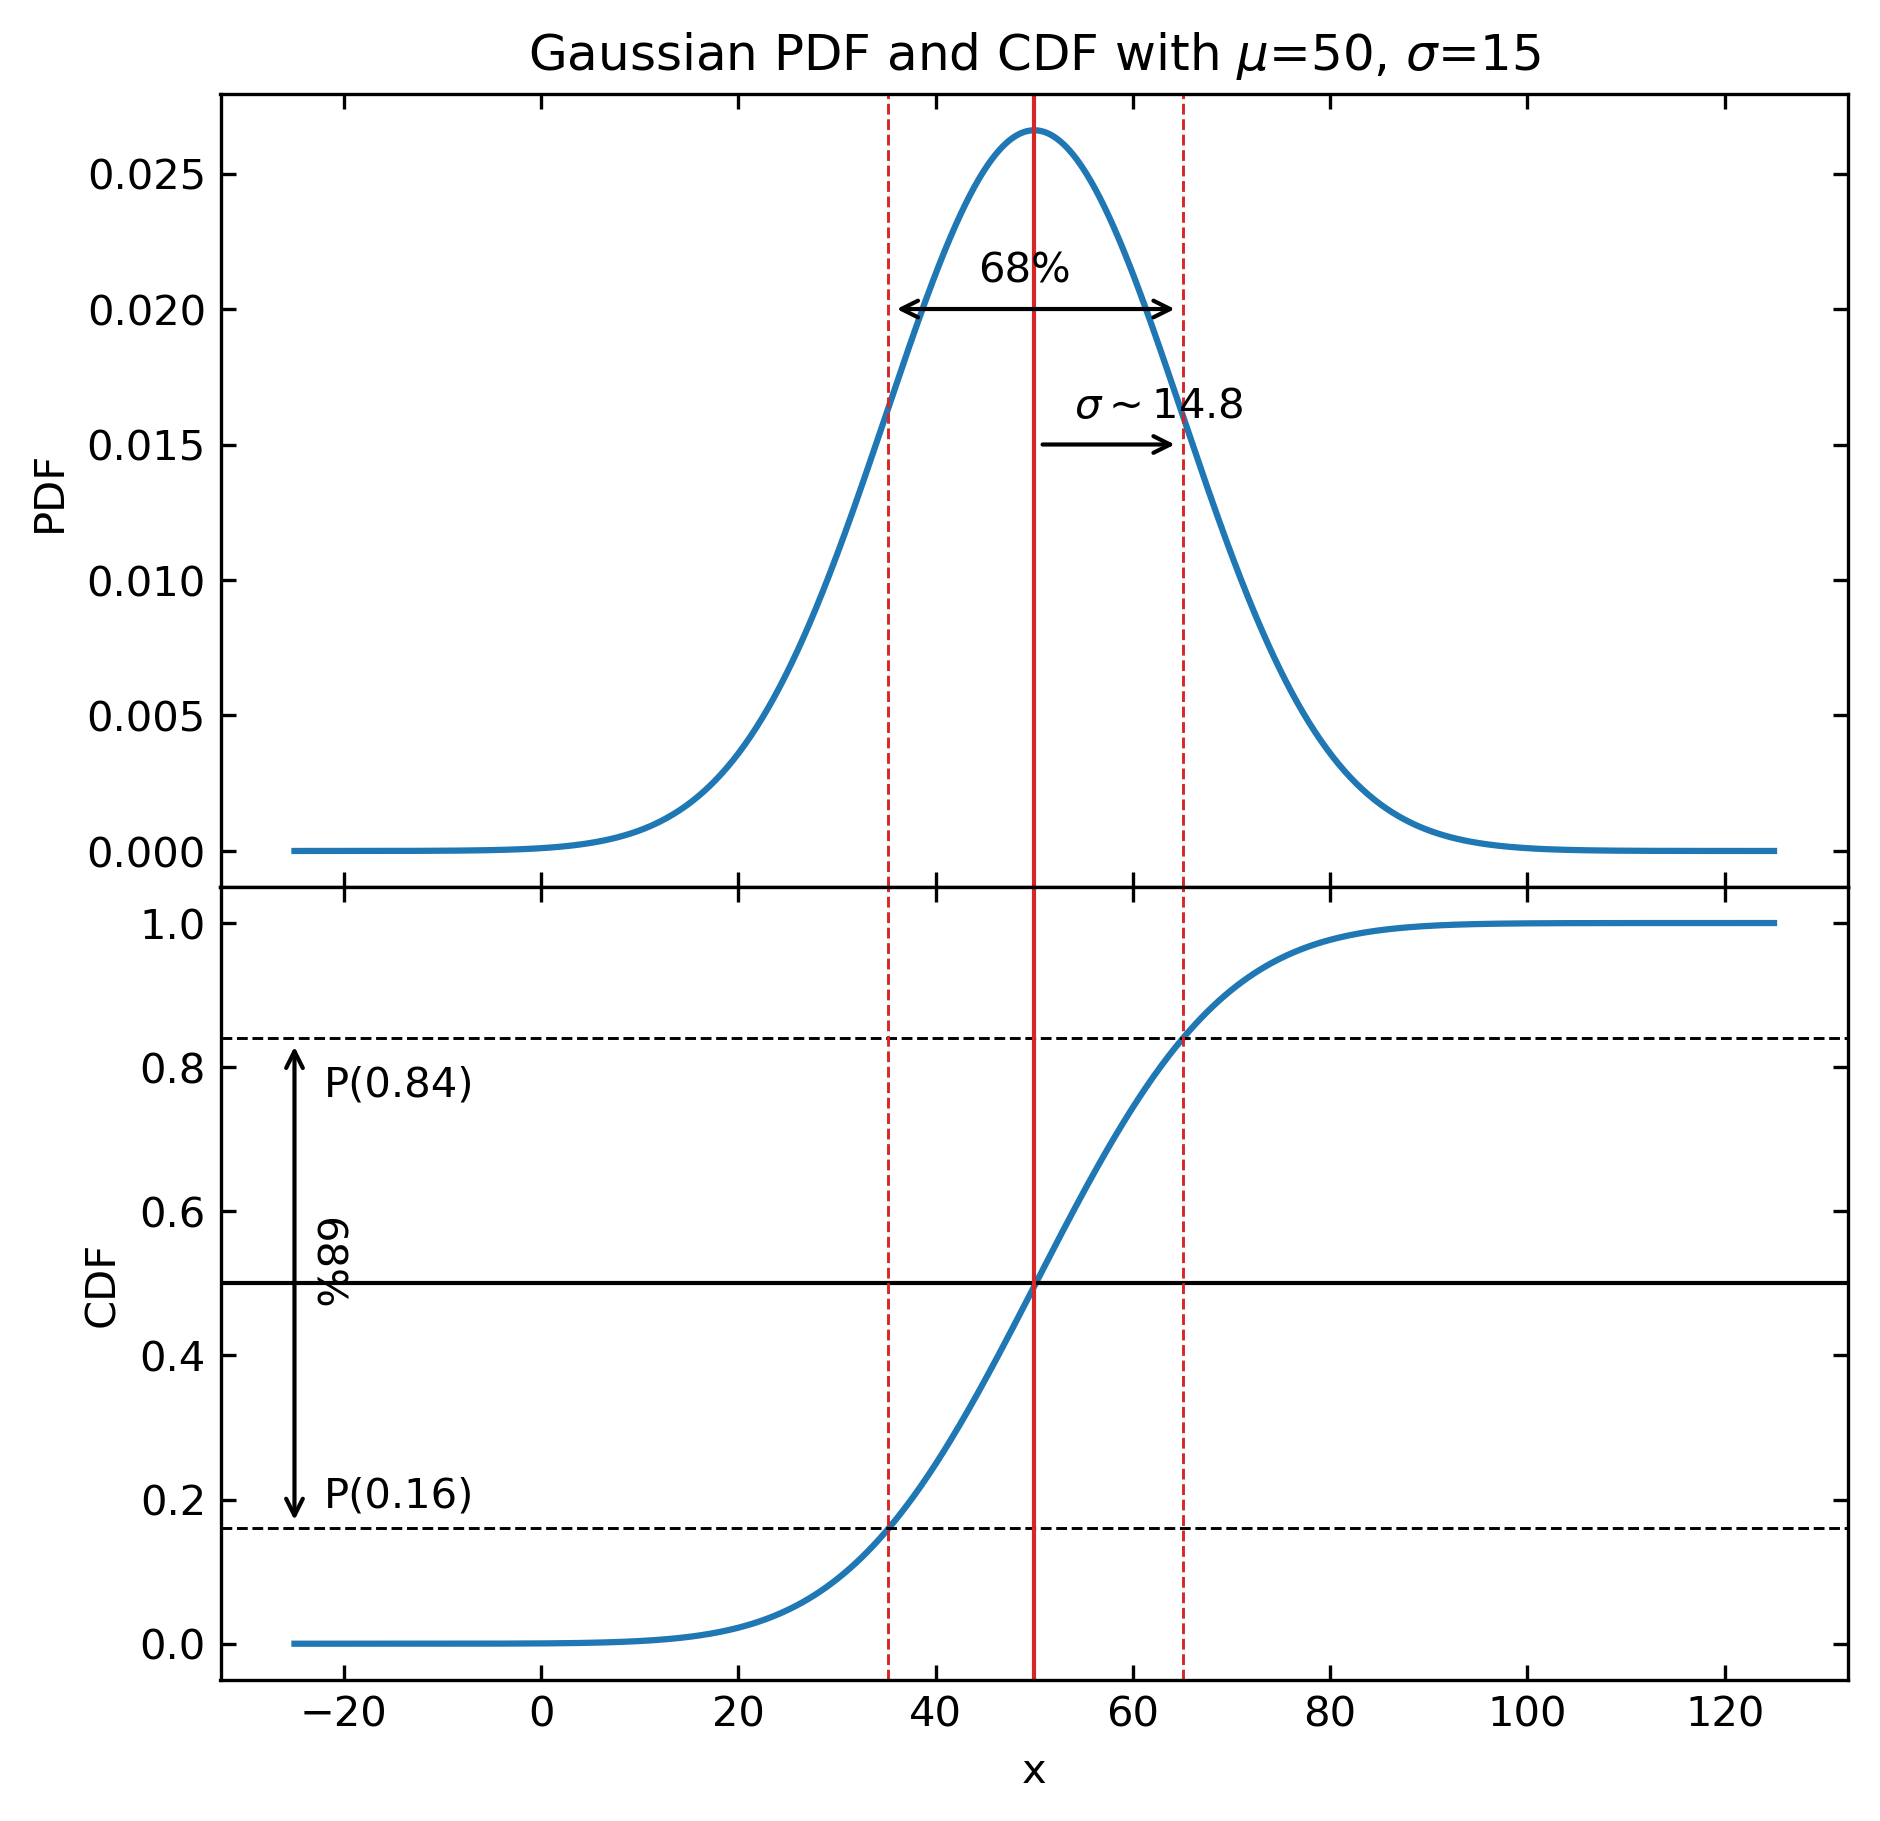

In [14]:
# Define variables representing the 68% interval we calculated above
p_lower = 0.16
p_upper = 0.84
p_label = '68%'

# ====== Create same plot as above =======
f, ax = plt.subplots(2, 1, figsize=(7, 7), dpi=300, gridspec_kw={'hspace':0})
ax[0].plot(x, pdf, '-', c='tab:blue')
ax[1].plot(x, cdf, '-', c='tab:blue')

for i in range(2):
    ax[i].tick_params(axis='both', right=True, top=True, direction='in')
ax[0].set_title(f'Gaussian PDF and CDF with $\mu$={mean}, $\sigma$={stdev}')
ax[0].set_ylabel('PDF') 
ax[1].set_ylabel('CDF') 
ax[1].set_xlabel('x') 

# Plot horizontal lines on the CDF corresponding to the 68% interval
ax[1].axhline(p_lower, c='k', lw=.7, ls='--' )
ax[1].axhline(0.50, c='k', lw=1, ls='-' )
ax[1].axhline(p_upper, c='k', lw=.7, ls='--' )

# Label the lines
ax[1].text(-22, p_upper-0.08, f'P({p_upper})') 
ax[1].text(-22, p_lower+0.03, f'P({p_lower})') 

ax[1].annotate(s='', xy=(-25, p_lower), xytext=(-25, p_upper), 
               arrowprops=dict(arrowstyle='<->'))
ax[1].text(-24, 0.55, p_label, style='normal', rotation=270) 
# =========================================

# Find the x values of the 68% probability interval
x_upper = x[np.argmin(np.abs(cdf - p_upper))]
x_lower = x[np.argmin(np.abs(cdf - p_lower))]

# Trace lines along these x values and the mean up to the PDF
for i in range(2):
       ax[i].axvline(x_lower, c='tab:red', lw=.7, ls='--' )
       ax[i].axvline(mean, c='tab:red', lw=1,  ls='-' )
       ax[i].axvline(x_upper, c='tab:red', lw=.7, ls='--' )

ax[0].annotate(s='', xy=(x_upper, 0.02), xytext=(x_lower, 0.02), 
               arrowprops=dict(arrowstyle='<->'))
ax[0].text(49, 0.021, p_label, style='normal', horizontalalignment='center')
ax[0].annotate(s='', xy=(mean, 0.015), xytext=(x_upper, 0.015), 
arrowprops=dict(arrowstyle='<-'))
ax[0].text(54, 0.016, f'$\sigma \sim {mean-x_lower:.1f}$')

## Practice Part 1

We can similarly plot the $2\sigma$ and $3\sigma$ intervals corresponding to the 95% and 99.7% intervals according to the 68-95-99.7 rule. Adjust the code below to capture the 95% and 99.7% intervals. Try labelling the plots similarly to the example above.

Text(49, 0.021, &#39;100%&#39;)

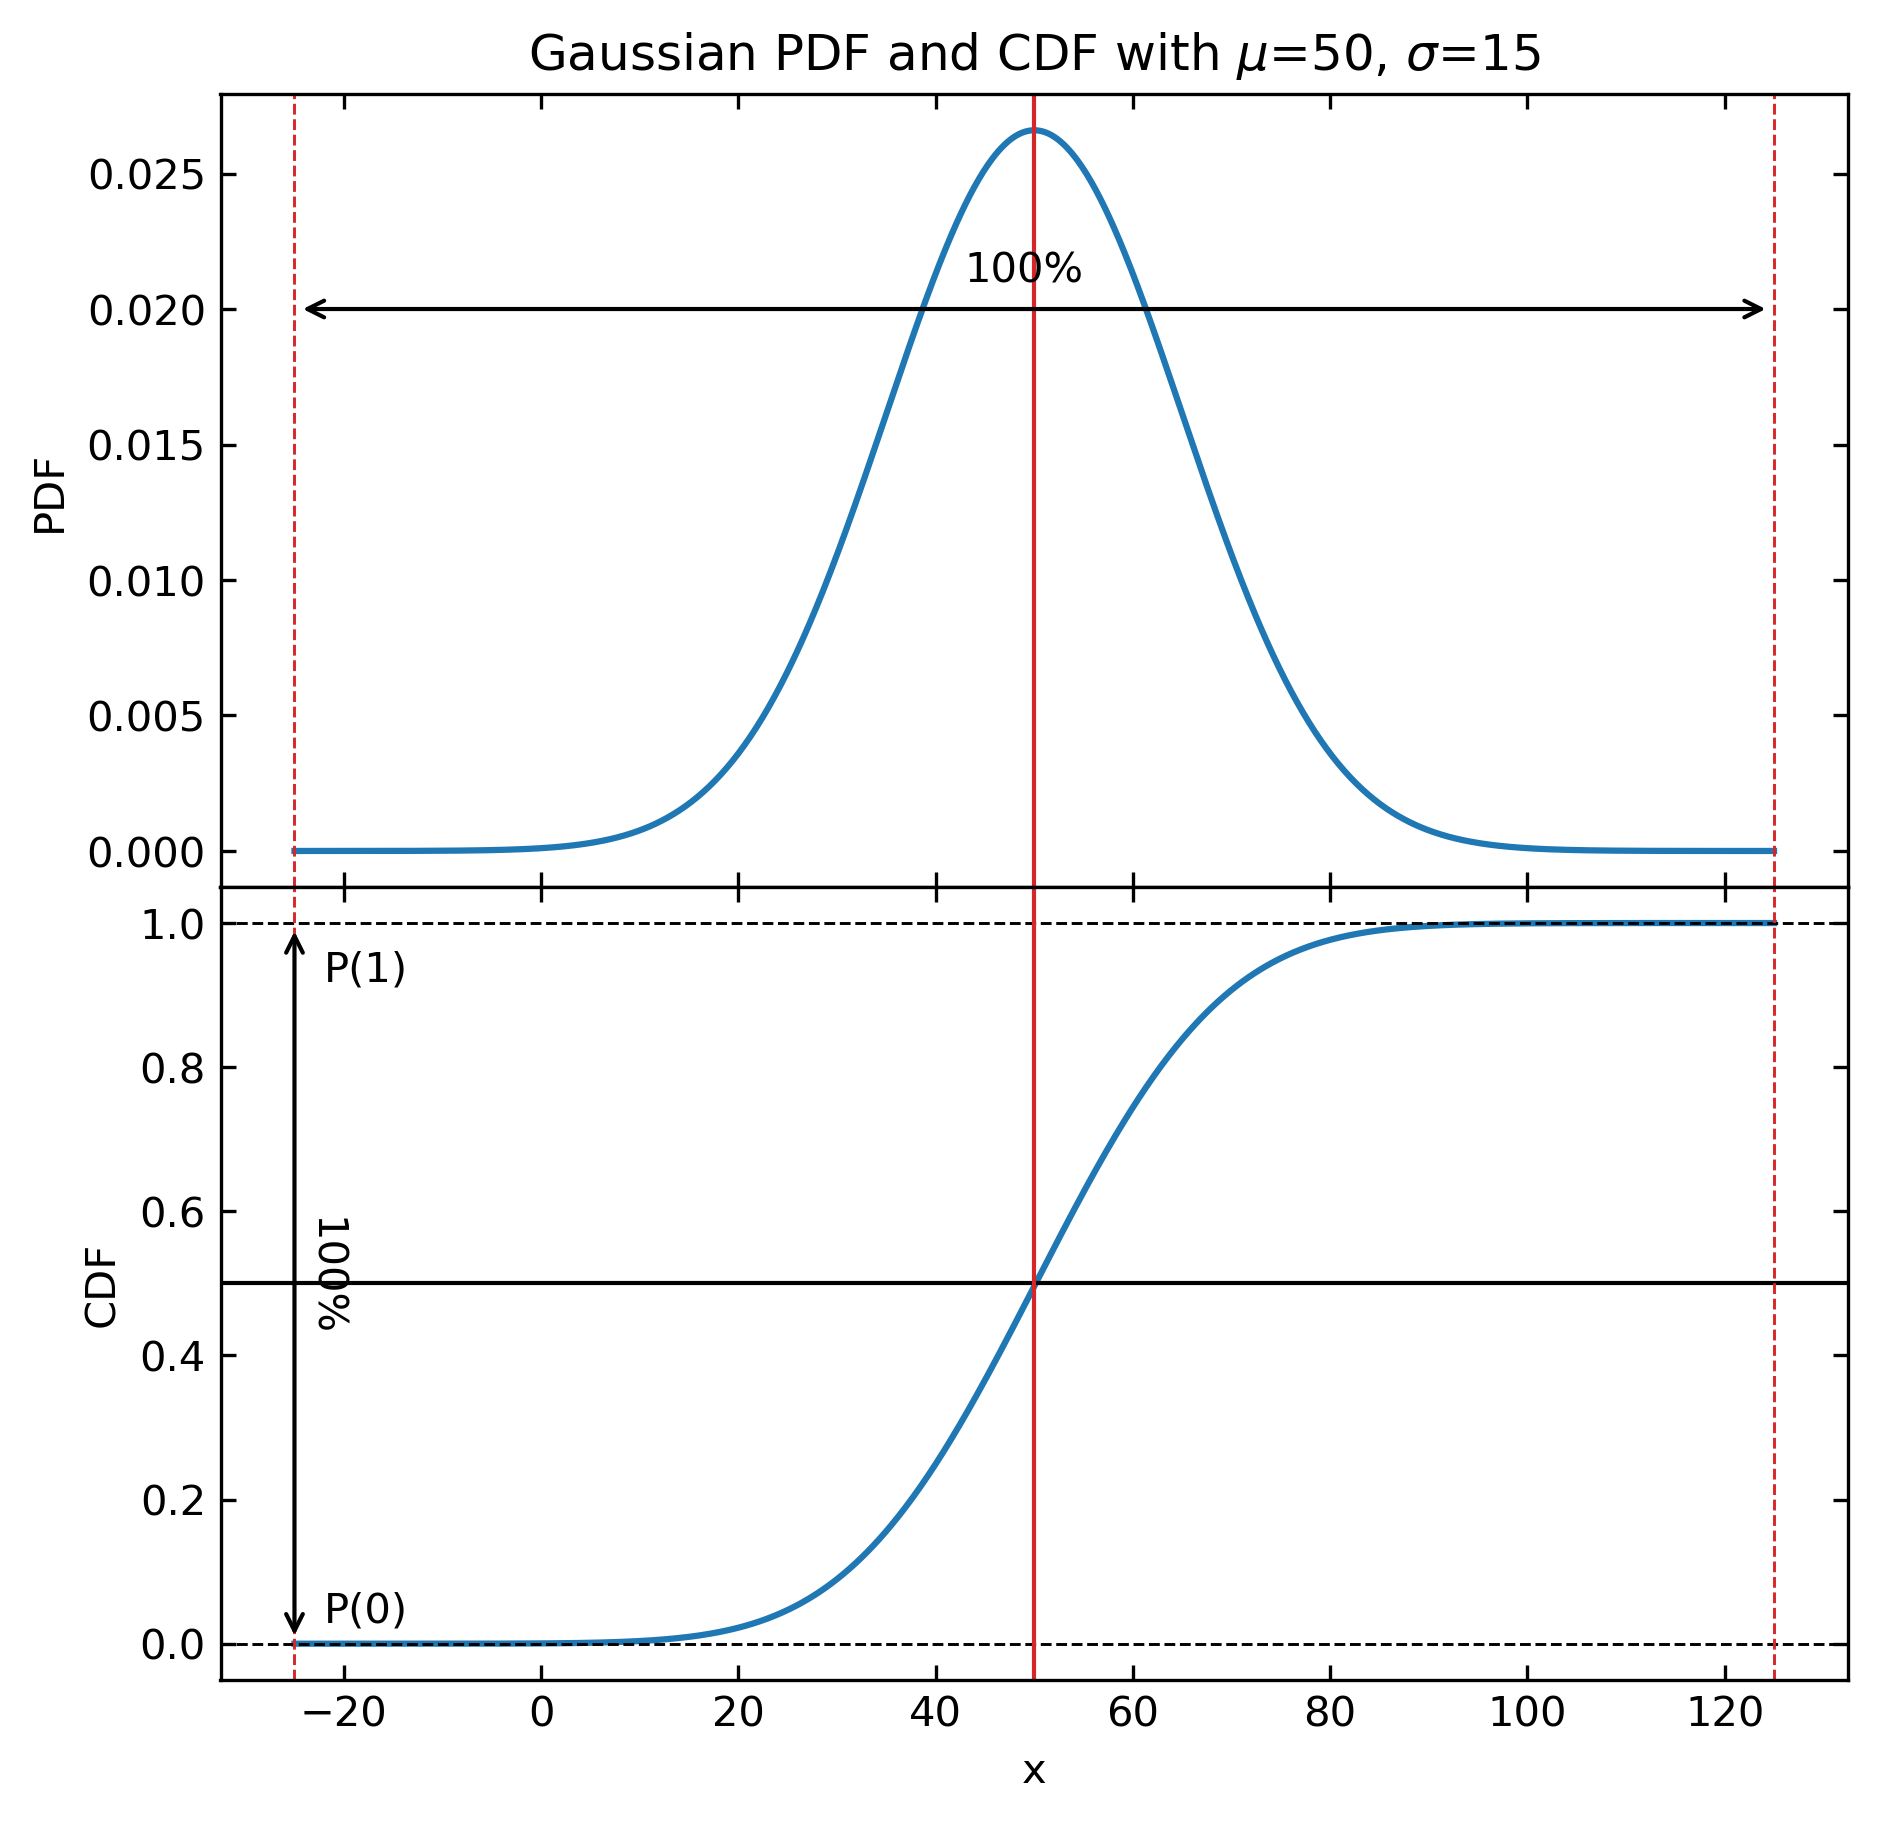

In [15]:
# Define a lower and upper probabilities of a new interval (95% or 99.7%)
p_lower = 0 # set me
p_upper = 1 # set me
p_label = '100%' # set me

# Plot result
f, ax = plt.subplots(2, 1, figsize=(7, 7), dpi=300, gridspec_kw={'hspace':0})
ax[0].plot(x, pdf, '-', c='tab:blue')
ax[1].plot(x, cdf, '-', c='tab:blue')

for i in range(2):
    ax[i].tick_params(axis='both', right=True, top=True, direction='in')
ax[0].set_title(f'Gaussian PDF and CDF with $\mu$={mean}, $\sigma$={stdev}')
ax[0].set_ylabel('PDF') 
ax[1].set_ylabel('CDF') 
ax[1].set_xlabel('x') 

# Plot horizontal lines on the CDF corresponding to the 68% interval
ax[1].axhline(p_lower, c='k', lw=.7, ls='--' )
ax[1].axhline(0.50, c='k', lw=1, ls='-' )
ax[1].axhline(p_upper, c='k', lw=.7, ls='--' )

# Label the lines
ax[1].text(-22, p_upper-0.08, f'P({p_upper})') 
ax[1].text(-22, p_lower+0.03, f'P({p_lower})') 

ax[1].annotate(s='', xy=(-25, p_lower), xytext=(-25, p_upper), 
               arrowprops=dict(arrowstyle='<->'))
ax[1].text(-24, 0.55, p_label, style='normal', rotation=270) 

# Find the x values of the 68% probability interval
x_upper = x[np.argmin(np.abs(cdf - p_upper))]
x_lower = x[np.argmin(np.abs(cdf - p_lower))]

# Trace lines along these x values and the mean up to the PDF
for i in range(2):
       ax[i].axvline(x_lower, c='tab:red', lw=.7, ls='--' )
       ax[i].axvline(mean, c='tab:red', lw=1,  ls='-' )
       ax[i].axvline(x_upper, c='tab:red', lw=.7, ls='--' )

ax[0].annotate(s='', xy=(x_upper, 0.02), xytext=(x_lower, 0.02), 
               arrowprops=dict(arrowstyle='<->'))
ax[0].text(49, 0.021, p_label, style='normal', horizontalalignment='center')

## Practice Part 2

Let try plotting a new curve. Below is Planck's Law of blackbody radiation:

$B(\lambda, T) = \frac{2 \pi c^2 h}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k{_b} T}} - 1}$


Where $\lambda$ is the wavelength, $T$ is temperature, $c$ is the speed of light, $h$ is Planck's constant and $k_b$ is the Boltzmann constant.

Reference: [HyperPhysics](http://hyperphysics.phy-astr.gsu.edu/hbase/bbrc.html)

In [9]:
# Constants
pi = 3.14159
c = 2.998e8  # m/s
h = 6.626e-34  # m^2 kg / s
kb = 1.381e-23  # m^2 kg /(K s^2)

# Define the function here

# Choose a temperature and define a wavelength array

# Compute the power at each wavelength using your defined function

# Plot power over wavelength


## Practice Part 3

Modify your plot to make it look exactly like the plot below.

Helpful links:

- Matplotlib customization docs [link](https://matplotlib.org/3.3.2/tutorials/introductory/customizing.html)
- Guide to customizing in Matplotlib: [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html)


![prompt](images/sp_function-plotting-1.png)

Img reference: [HyperPhysics](http://hyperphysics.phy-astr.gsu.edu/hbase/bbrc.html#c3)

In [10]:
# Make your HyperPhysics style plot here!
